<a href="https://colab.research.google.com/github/Anishoond/Prediccion-del-tiempo-de-permanencia-de-pacientes-en-un-hospital/blob/main/01_Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Obtencion de los archivos en formato Zip desde repositorio Github
!wget https://github.com/anishoond/Archivos_Proyecto/blob/main/Archivos_proyecto.zip?raw=true

--2023-04-23 02:09:54--  https://github.com/anishoond/Archivos_Proyecto/blob/main/Archivos_proyecto.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/anishoond/Archivos_Proyecto/raw/main/Archivos_proyecto.zip [following]
--2023-04-23 02:09:54--  https://github.com/anishoond/Archivos_Proyecto/raw/main/Archivos_proyecto.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anishoond/Archivos_Proyecto/main/Archivos_proyecto.zip [following]
--2023-04-23 02:09:54--  https://raw.githubusercontent.com/anishoond/Archivos_Proyecto/main/Archivos_proyecto.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
 # Se descomprimen los archivos
 !unzip /content/Archivos_proyecto.zip?raw=true

Archive:  /content/Archivos_proyecto.zip?raw=true
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Se carga la base de datos
data_train = pd.read_csv("train.csv",index_col=0)
data_test = pd.read_csv("test.csv",index_col=0) #Dataset adicional para prueba
data_train.head(15)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60


In [ ]:
# Variables
data_train.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [ ]:
data_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [ ]:
# Tamaño del dataset
print(data_train.shape)
print(data_test.shape) #Dataset adicional para prueba

(318438, 17)
(137057, 16)


In [ ]:
# Tipo de datos en el dataset
for c in data_train.columns:
    print ("%20s"%c, data_train[c].dtype)

       Hospital_code int64
  Hospital_type_code object
  City_Code_Hospital int64
Hospital_region_code object
Available Extra Rooms in Hospital int64
          Department object
           Ward_Type object
  Ward_Facility_Code object
           Bed Grade float64
           patientid int64
   City_Code_Patient float64
   Type of Admission object
 Severity of Illness object
Visitors with Patient int64
                 Age object
   Admission_Deposit float64
                Stay object


In [ ]:
#Variables categóricas
ccols = [i for i in data_train.columns if not i in data_train._get_numeric_data()]
for c in ccols:
    print ("%10s"%c, np.unique(data_train[c].dropna()))

Hospital_type_code ['a' 'b' 'c' 'd' 'e' 'f' 'g']
Hospital_region_code ['X' 'Y' 'Z']
Department ['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery']
 Ward_Type ['P' 'Q' 'R' 'S' 'T' 'U']
Ward_Facility_Code ['A' 'B' 'C' 'D' 'E' 'F']
Type of Admission ['Emergency' 'Trauma' 'Urgent']
Severity of Illness ['Extreme' 'Minor' 'Moderate']
       Age ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100']
      Stay ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100' 'More than 100 Days']


In [ ]:
# Datos nulos presentes en el dataset de entrenamiento
k = data_train.isna().sum()
k[k!=0]

Bed Grade             113
City_Code_Patient    4532
dtype: int64

In [ ]:
# Datos nulos presentes en el dataset de prueba adicional
k = data_test.isna().sum()
k[k!=0]

Bed Grade              35
City_Code_Patient    2157
dtype: int64

In [ ]:
#Visualiación de columnas numericas
data_train.select_dtypes(np.number).head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,4911.0
2,2,5,2,2.0,31397,7.0,2,5954.0
3,10,1,2,2.0,31397,7.0,2,4745.0
4,26,2,2,2.0,31397,7.0,2,7272.0
5,26,2,2,2.0,31397,7.0,2,5558.0


In [ ]:
DT_in = data_train[:]

DT_in2 = DT_in[:] # COPIA DEL DATA SET ORIGINAL: se hace esta copia pues en este data frame se guardarán 
                  # los datos modificados

C_STR_names = [] # lista que contiene los nombres de las columnas que incluyen variables tipo objeto

C_STR_values = [] # lista que contiene las varibles categoricas pertenecientes a cada columna


In [ ]:
for i in DT_in.columns:
    if DT_in[i].dtype == 'object':
     C_STR_names.append(i) 
     C_STR_values.append(np.unique(DT_in[i]))

print(C_STR_names)
print('\n')
print(C_STR_values)
 

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


[array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object), array(['X', 'Y', 'Z'], dtype=object), array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object), array(['P', 'Q', 'R', 'S', 'T', 'U'], dtype=object), array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object), array(['Emergency', 'Trauma', 'Urgent'], dtype=object), array(['Extreme', 'Minor', 'Moderate'], dtype=object), array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100'], dtype=object), array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100', 'More than 100 Days'], dtype=object)]


In [ ]:
#FUNCION QUE TIENE COMO OBJETIVO ASIGNAR UN VALOR NUMERICO A CADA VARIBLE CATEGORICA
#POR AHORA ESTÁ PROGRAMADO PARA ASIGNAR UNOS Y CEROS

def hinzu_columns(name_c, values_c,DF_org):
    
    """name_c = nombre de la columna que contiene los nombres
        de las columnas a agregar
    
      values_c= nombres de las columnas a agregar
     
      DF_org =  el data frame en donde se encuentran la columna 
      con nombre name_c y a la cual pertenecen los valores contenidos
      en la lista values_c
      
      indx_obj = será una lista de listas en donde cada elemento 
      corresponderá a un array lleno se unos y ceros. así se cambiará de una
      etiqueta string a una númerica
    
    """
    # for name_c in C_STR_names[contador_names:contador_names+1]:
        
    indx_obj = np.array([(DF_org[name_c] == val_c)*1 for val_c in values_c ])
    
    
    return indx_obj


In [ ]:
#SE EMPLEA LA FUNCIÓN ANTERIOR PARA CONVERTIR LAS VARIABLES CATEGORICAS EN COLUMNAS 
# Y RELLENAR LOS DATOS DE CADA FILA CON UN 0 U 1 

for n in range(7):
    
    new_columns = np.transpose(hinzu_columns(C_STR_names[n],C_STR_values[n],DT_in))
    
    
    DT_in2[C_STR_values[n]] = new_columns

<ipython-input-16-e6ac3bb8108d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DT_in2[C_STR_values[n]] = new_columns
<ipython-input-16-e6ac3bb8108d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DT_in2[C_STR_values[n]] = new_columns
<ipython-input-16-e6ac3bb8108d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
#SE PUEDE OBSERVAR COMO LAS VARIABLES CONTENIDAS EN LAS COLUMNAS DEL DARA SET ORIGINAL
#AHORA SON COLUMNAS, ASÍ MISMO YA NO SE TIENEN VALRIABLES CATEGORICAS, SOLO NUMERICAS

DT_in2.drop(C_STR_names[:7], axis = 'columns', inplace=True)
DT_in2

<ipython-input-17-3c708fe7f547>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DT_in2.drop(C_STR_names[:7], axis = 'columns', inplace=True)


,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Age,Admission_Deposit,Stay,...,C,D,E,F,Emergency,Trauma,Urgent,Extreme,Minor,Moderate
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,51-60,4911.0,0-10,...,0,0,0,1,1,0,0,1,0,0
2,2,5,2,2.0,31397,7.0,2,51-60,5954.0,41-50,...,0,0,0,1,0,1,0,1,0,0
3,10,1,2,2.0,31397,7.0,2,51-60,4745.0,31-40,...,0,0,1,0,0,1,0,1,0,0
4,26,2,2,2.0,31397,7.0,2,51-60,7272.0,41-50,...,0,1,0,0,0,1,0,1,0,0
5,26,2,2,2.0,31397,7.0,2,51-60,5558.0,41-50,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,3,41-50,4144.0,11-20,...,0,0,0,1,1,0,0,0,0,1
318435,24,1,2,4.0,325,8.0,4,81-90,6699.0,31-40,...,0,0,1,0,0,0,1,0,0,1
318436,7,4,3,4.0,125235,10.0,3,71-80,4235.0,11-20,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
#A PESAR DE QUE ALGUNAS VARIABLES CONTENIDAS EN COLUMNAS SON IDENTIFICADAS COMO CATEGORICAS
#ESTAS CORRESPONDEN A UN RANGO, COMO EN LA COLUMA DE 'Age' y 'Stay'
#POR LO CUAL SE DECIDEN CREAR COLUMNAS EN LAS QUE SE CONTANTAN 
#EL VALOR MINIMO Y MAXIMO DEL RANGO


def rangos_edades (rango_str, DTf_ages, col_name_org, new_col_min, new_col_max):
    """rango_str =  es un string con dos valores, un minimo y un maximo
    
    DTf_ages, es un data frame en donde se agregaran los valores minimos
    y maximos extraidos de rango_str a la columna correspondiente
    
    como resultado de la función se tendrá que en el data frame entregado 
    se escribirán los valores minimos y maximos en las columnas especificadas

    """
    
    guion = rango_str.index('-')
    
    min_rango = int(rango_str[0:guion])
    
    max_rango = int(rango_str[guion+1:])
    
    
    DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_min] = min_rango
    
    DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_max] = max_rango
    
    return min_rango, max_rango

In [ ]:
for age in C_STR_values[7]:
    
   rangos_edades(age,DT_in2,'Age','edad_min','edad_max')

DT_in2.drop(C_STR_names[7], axis = 'columns', inplace=True)


More_than_100_Days = DT_in2['Stay']=='More than 100 Days'
indices_More_than_100_Days = More_than_100_Days.loc[More_than_100_Days == True].index

DT_in2.loc[indices_More_than_100_Days , 'Stay'] = '101-110'


C_STR_values[8][-1] = '101-110'

for days in C_STR_values[8]:
    
    rangos_edades(days,DT_in2,'Stay','min_days','max_days')


DT_in2.drop('Stay', axis = 'columns', inplace=True)

#SE OBSERVA QUE SE HAN CAMBIADO LAS COLUMNAS STAY Y AGE POR DOS NUEVAS COLUMNAS
#QUE CONTIENEN LOS VALORES DE LOS RANGOS
DT_in2


<ipython-input-18-e6b41a41522c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_min] = min_rango
<ipython-input-18-e6b41a41522c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DTf_ages.loc[DTf_ages[col_name_org] == rango_str, new_col_max] = max_rango
<ipython-input-19-ac7543a65f88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,a,b,...,Emergency,Trauma,Urgent,Extreme,Minor,Moderate,edad_min,edad_max,min_days,max_days
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,4911.0,0,0,...,1,0,0,1,0,0,51.0,60.0,0.0,10.0
2,2,5,2,2.0,31397,7.0,2,5954.0,0,0,...,0,1,0,1,0,0,51.0,60.0,41.0,50.0
3,10,1,2,2.0,31397,7.0,2,4745.0,0,0,...,0,1,0,1,0,0,51.0,60.0,31.0,40.0
4,26,2,2,2.0,31397,7.0,2,7272.0,0,1,...,0,1,0,1,0,0,51.0,60.0,41.0,50.0
5,26,2,2,2.0,31397,7.0,2,5558.0,0,1,...,0,1,0,1,0,0,51.0,60.0,41.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,3,4144.0,1,0,...,1,0,0,0,0,1,41.0,50.0,11.0,20.0
318435,24,1,2,4.0,325,8.0,4,6699.0,1,0,...,0,0,1,0,0,1,81.0,90.0,31.0,40.0
318436,7,4,3,4.0,125235,10.0,3,4235.0,1,0,...,1,0,0,0,1,0,71.0,80.0,11.0,20.0


In [ ]:

#LOS DATOS NA ESTAN ASOCIADOS CON COLUMNAS QUE CONTIENEN VALORES NUMERICOS ACOTADOS
#ES DECIR, SE ENCUENTRAN EN UN RANGO, POR LO CUAL LA ESTRATEGIA DE LLENADO DE DATOS 
#ES REEMPLAZAR EL VALOR NA POR UN VALOR DENTRO DE UN RANGO LOGICO
import random as rnd
def random_fill_nan(col_name_nan, DTf_rep_nan):
    
    """col_name_nan es el nombre de la columna en donde se tienen valores 
    NaN
    
    DTf_rep_nan es el data frame que contiene la columna con nombre col_name_nan
    y en donde se van a reemplzar los valores por NaN por otro valor.
    
    Los datos NaN se reemplzan por un valor aleatorio contenido en los valores
    existentes en las columnas.
    
    La función retorna un El data set ingresado sin datos NaN
    """
    
    
    val_na_col = DTf_rep_nan[col_name_nan].isna()
    
    indices_nan= val_na_col.loc[val_na_col == True].index
    
    values_in_nan_cols = np.unique(DTf_rep_nan[col_name_nan])

    min_val_replace = min(values_in_nan_cols)
    
    max_val_replace = max(values_in_nan_cols)
    
    for indx_nan_r in indices_nan:
       
        new_nan1 = float(rnd.randint(min_val_replace,max_val_replace))
        
        DTf_rep_nan.loc[indx_nan_r , col_name_nan] = new_nan1
    
    return 'done'

In [ ]:
col_names_nan = []
for na_obj in DT_in2.columns:
    
    if np.sum(DT_in2[na_obj].isna()) !=0:
        col_names_nan.append(na_obj)
 



for c_nan_name in col_names_nan:
    
    random_fill_nan(c_nan_name,DT_in2)

In [ ]:
#SE OBSEERVAN LAS NUEVAS COLUMNAS DEL DATA SET DE TRAIN
#SE OBSERVA TAMBIÉN QUE NO SE TIENEN DATOS NULOS NI TIPO OBJECT

for na_obj in DT_in2.columns:
    
    
     print ("%20s"%na_obj, np.sum(DT_in2[na_obj].isna()),'  type', DT_in2[na_obj].dtype)
     
print('\n')


       Hospital_code 0   type int64
  City_Code_Hospital 0   type int64
Available Extra Rooms in Hospital 0   type int64
           Bed Grade 0   type float64
           patientid 0   type int64
   City_Code_Patient 0   type float64
Visitors with Patient 0   type int64
   Admission_Deposit 0   type float64
                   a 0   type int64
                   b 0   type int64
                   c 0   type int64
                   d 0   type int64
                   e 0   type int64
                   f 0   type int64
                   g 0   type int64
                   X 0   type int64
                   Y 0   type int64
                   Z 0   type int64
  TB & Chest disease 0   type int64
          anesthesia 0   type int64
          gynecology 0   type int64
        radiotherapy 0   type int64
             surgery 0   type int64
                   P 0   type int64
                   Q 0   type int64
                   R 0   type int64
                   S 0   type int64
        

In [ ]:
#GRAFICA DE DATOS

DT_in1 = DT_in[:]

DT_in1['min_days'] = DT_in2['min_days']

DT_in1.drop('Stay', axis = 'columns', inplace=True)



C_STR_names[0]
DT_in1


<ipython-input-23-fe5b108d7d0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DT_in1['min_days'] = DT_in2['min_days']


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,min_days
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0.0
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41.0
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31.0
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41.0
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11.0
318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31.0
318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11.0


<ipython-input-24-9d1287dab844>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-24-9d1287dab844>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-24-9d1287dab844>:6: UserWarning: 

`distplot` is a deprec

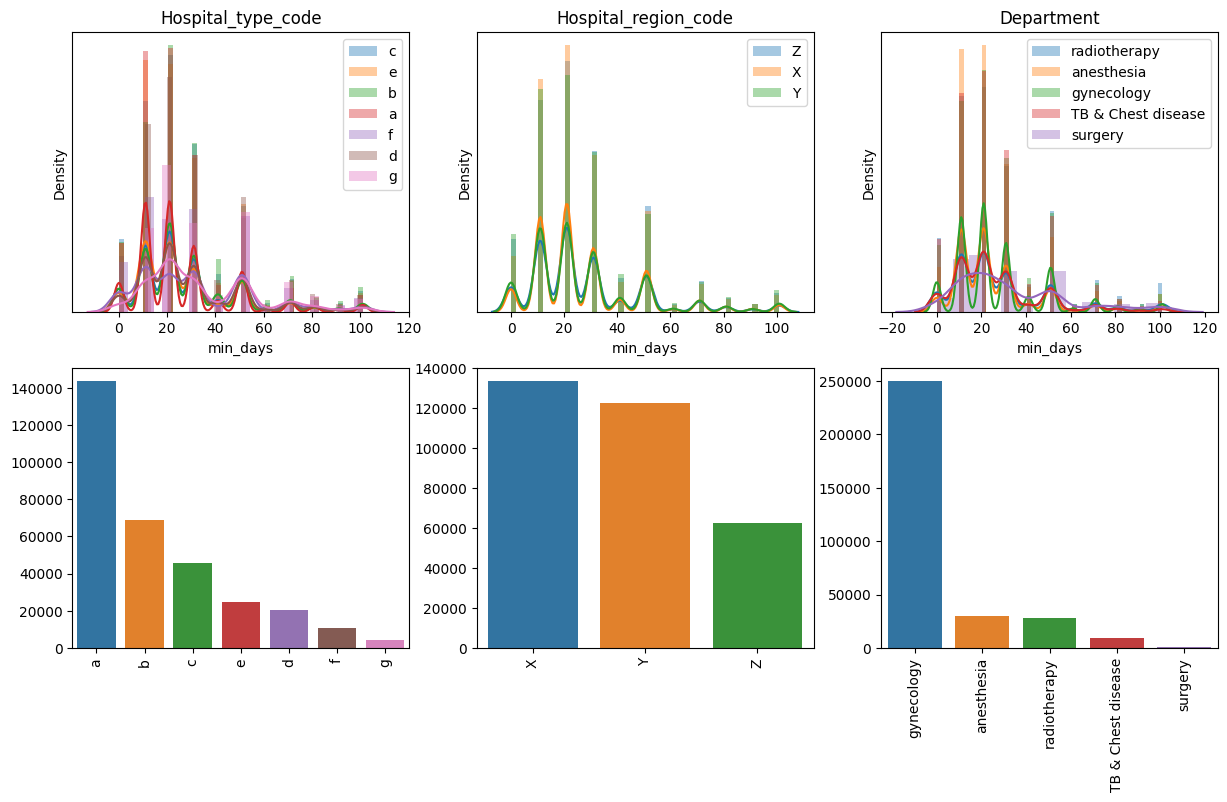

In [ ]:
plt.figure(figsize=(20,8))
for i,c in enumerate(C_STR_names[:3]):    
    plt.subplot(2,4,i+1)
    k=DT_in1[[c,"min_days"]].dropna()
    for v in DT_in1[c].dropna().unique():
        sns.distplot(k.min_days[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    #print(vc.values)
    df_g = pd.DataFrame(vc)

    np.transpose(df_g)
    sns.barplot(data = np.transpose(df_g)) 
    #sns.barplot(vc)    
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

<ipython-input-25-ad8ebac145e7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-25-ad8ebac145e7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-25-ad8ebac145e7>:6: UserWarning: 

`distplot` is a deprec

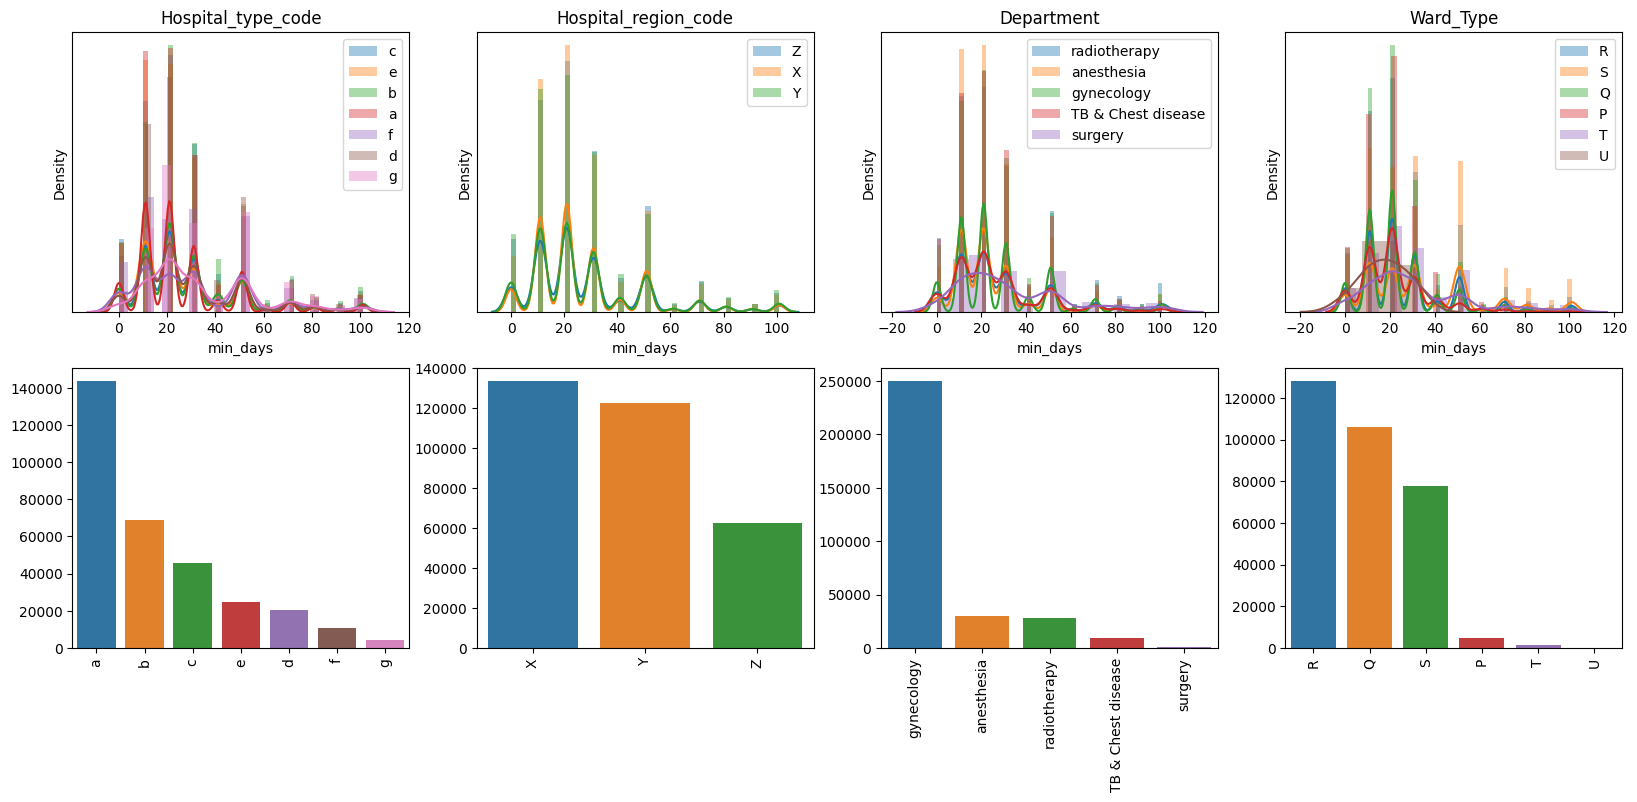

In [ ]:
plt.figure(figsize=(20,8))
for i,c in enumerate(C_STR_names[:4]):    
    plt.subplot(2,4,i+1)
    k=DT_in1[[c,"min_days"]].dropna()
    for v in DT_in1[c].dropna().unique():
        sns.distplot(k.min_days[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    #print(vc.values)
    df_g = pd.DataFrame(vc)

    np.transpose(df_g)
    sns.barplot(data = np.transpose(df_g)) 
    #sns.barplot(vc)    
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

<ipython-input-26-558aa03510bc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-26-558aa03510bc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.min_days[k[c]==v], label=v);
<ipython-input-26-558aa03510bc>:6: UserWarning: 

`distplot` is a deprec

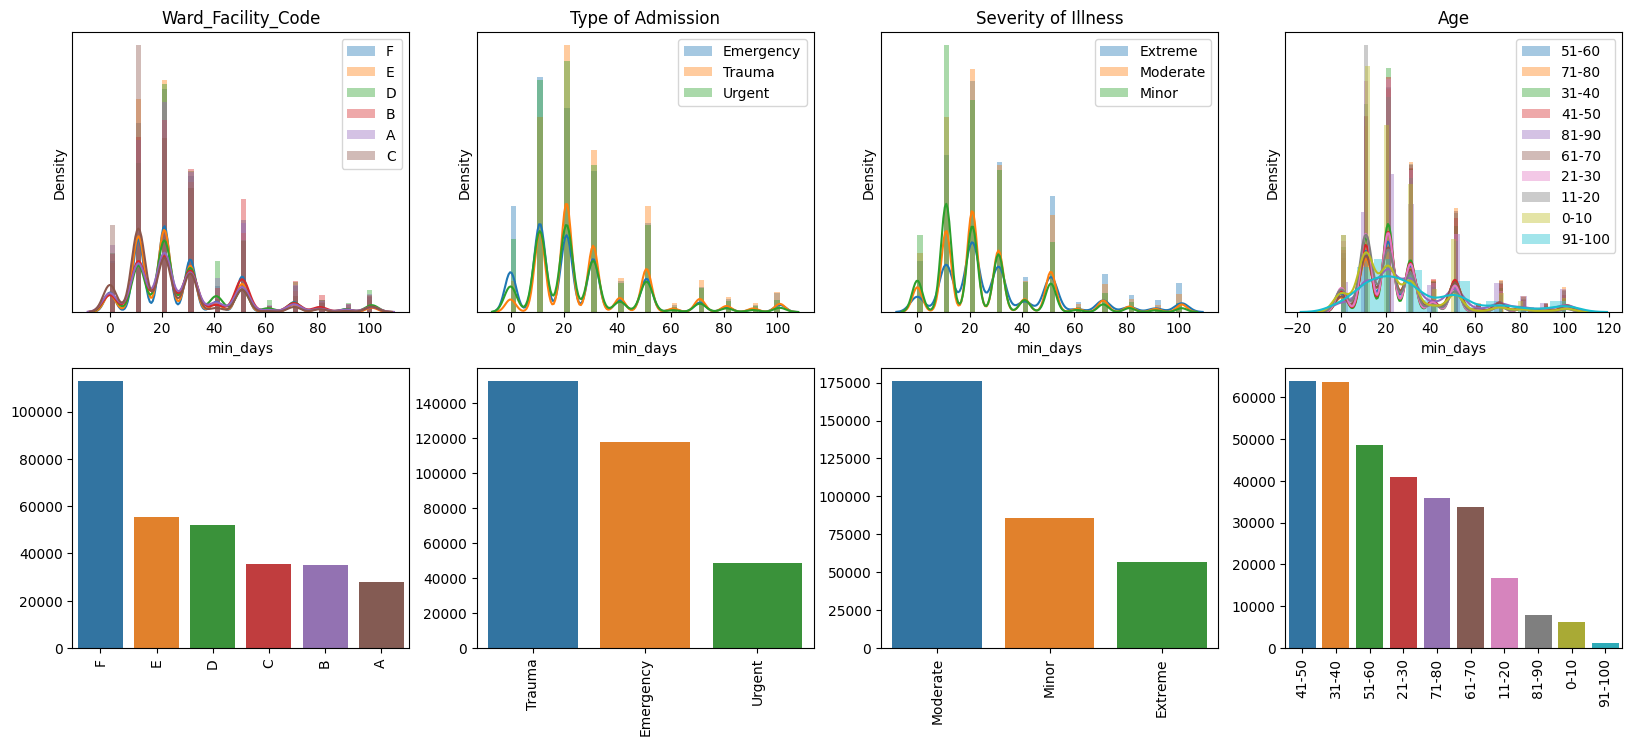

In [ ]:
plt.figure(figsize=(20,8))
for i,c in enumerate(C_STR_names[4:8]):    
    plt.subplot(2,4,i+1)
    k=DT_in1[[c,"min_days"]].dropna()
    for v in DT_in1[c].dropna().unique():
        sns.distplot(k.min_days[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    #print(vc.values)
    df_g = pd.DataFrame(vc)

    np.transpose(df_g)
    sns.barplot(data = np.transpose(df_g)) 
    #sns.barplot(vc)    
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

<Axes: >

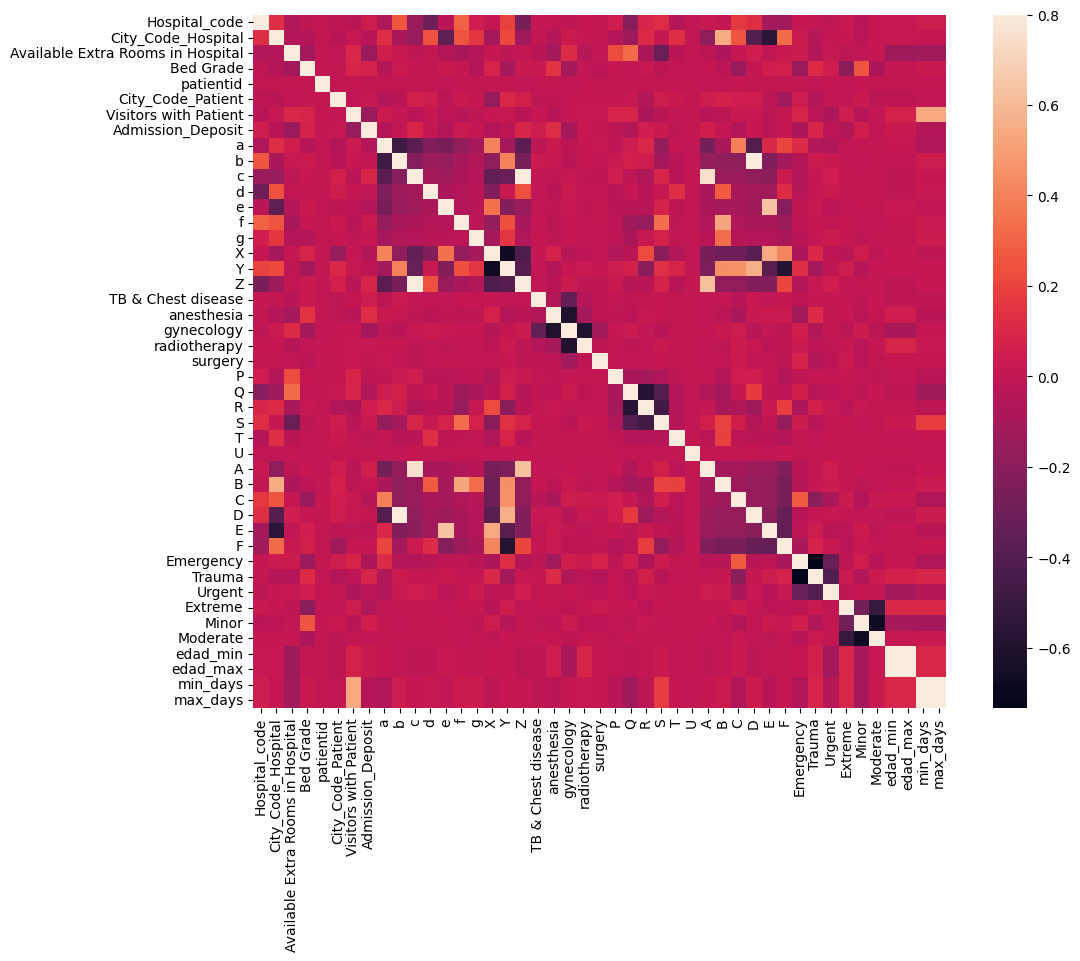

In [ ]:
corrmat = DT_in2[DT_in2.columns[:]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)